In [0]:
import tensorflow as tf
print(tf.__version__)

# This is needed for the iterator over the data
# But not necessary if you have TF 2.0 installed
#!pip install tensorflow==2.0.0-beta0


tf.enable_eager_execution()

1.15.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout, Activation, BatchNormalization, LSTM
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras.models import Sequential

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cd /content/gdrive/My\ Drive/Razavi/Digi

/content/gdrive/My Drive/Razavi/Digi


In [0]:
df = pd.read_csv('classified_3.csv')

In [0]:
df.head(100)

,Unnamed: 0,Unnamed: 0.1,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages,class
0,2,2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,626843,1,0,verified,0,خیلی سخت حوله اش میاد,گیره های فلزی خیلی سخت میشوند لذا حوله خیلی سخ...,فیلد خالی,فیلد خالی,0
1,8,8,49738,ماشین اصلاح صورت رمینگتون مدل MB4555,PA,2764879,2,1,verified,1,عمر مفید کوتاه,متاسفانه عمر مفید ماشین کم هست بعد سال دیگه با...,فیلد خالی,طراحی ارگونومیک نیست حین اصلاح مو تیغه ها میمو...,0
2,9,9,161548,فلاسک هنری مدل Virginia Special ظرفیت 1.9 لیتر,HW,3934937,1,0,verified,1,خوب بودممنون,خوب بودممنون,فیلد خالی,فیلد خالی,0
3,10,10,5107,هارددیسک اکسترنال سیگیت مدل Backup Plus Deskto...,IT,794316,1,0,verified,2,هارد کیفیت ظاهر شیک,نزدیک ساله هارد رو خریدم استفاده سنگینی ازش ند...,کیفیت ساخت خوب ظاهر ساده زیبا صدای کم حجم زیاد,عدم مقاومت برابر ضربه عدم سهولت جا جایی دلیل آ...,0
4,18,18,90894,مچ‌ بند هوشمند آی واون مدل i5 Plus,PA,1338306,2,1,verified,1,لوازم یدکی,ساعت خوبی ظاهر سنسوراش خوب ولی یه بدی بزرگی دا...,اندازه ظاهر ضد آب,لوازم جانبی نداره آپدیت کردنش ریسک داره کیفیت ...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,724,724,332255,هدفون بی سیم هوآوی مدل Honor AM61,AC,5297419,2,1,verified,2,فوق العاده,حدود ۱ ساله خریدمش اصلا حرف نداره شارژ دهی فوق...,فیلد خالی,فیلد خالی,0
96,734,734,322991,لپ تاپ 15 اینچی ایسر مدل Aspire A715-71G-71Y3,IT,5380247,2,1,verified,1,یه نکته,دستگاهو ۶ ماه خریدم یه نکته قابل عرضه اینه لب ...,قدرت راندمان وزن ضخامت کیفیت میکروفون وای فای ...,خنک کاری خیلی کم ضعیف,0
97,735,735,100654,دستکش ایمنی نووا مدل NTG-9003,TC,3598992,1,0,verified,2,یدرد بخوره,خیلی راضیم ازش کثیفم میشه ماشین لباسشویی براحت...,محکم جوندار,نداره,0
98,736,736,143925,کفپوش سه بعدی صندوق خودرو بابل مناسب برای پرای...,TC,3598992,2,0,verified,2,خیلی خوب جنس عالی,تو خریدش شک نکنید,شیک محکم فیت پراید گازسوز,نداره,0


In [0]:
X = df['comment']
y = df['class']

In [0]:
from keras.utils import to_categorical
y_binary = to_categorical(y)

In [0]:
# Split train data into train and validation
train_x, valid_x, train_y, valid_y = train_test_split(X, y_binary, test_size=0.3)

In [0]:
train_labels = train_y
valid_labels = valid_y

## NN Models

In [0]:
vocab_size = 10000
embedding_dim = 60
max_length = 120
trunc_type='post'

In [0]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(train_x)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_x)
valid_sequences = tokenizer.texts_to_sequences(valid_x)

In [0]:
# get only the top frequent words on train
train_data = pad_sequences(train_sequences, padding = "post", maxlen = max_length)
# get only the top frequent words on test
valid_data = pad_sequences(valid_sequences, padding = "post", maxlen = max_length)

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(train_data[1]))
print(train_x[1])

ساده زیبا کیفیت قیمت های نجومی خرید سرویس شدیدا پیشنهاد میشه خیلی صرفه خوبه ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
متاسفانه عمر مفید ماشین کم هست بعد سال دیگه باطری کار نمیکنه گیر میکنه نحوی هیچیک دکمه ها کار نمیکنه چند ساعت حالت میمونه دوباره اتصال برق کار میکنه


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 60)           600000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 43206     
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 28        
Total params: 643,234
Trainable params: 643,234
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(train_data, train_labels, epochs = 10, validation_data = (valid_data, valid_labels), verbose = 1)

Train on 83101 samples, validate on 35615 samples
Epoch 1/10
83101/83101 [==============================] - 31s 371us/sample - loss: 1.2942 - acc: 0.3599 - val_loss: 1.1361 - val_acc: 0.4886
Epoch 2/10
83101/83101 [==============================] - 31s 376us/sample - loss: 0.8507 - acc: 0.6433 - val_loss: 0.9320 - val_acc: 0.6145
Epoch 3/10
83101/83101 [==============================] - 29s 353us/sample - loss: 0.5219 - acc: 0.7928 - val_loss: 0.9739 - val_acc: 0.6506
Epoch 4/10
83101/83101 [==============================] - 30s 362us/sample - loss: 0.3605 - acc: 0.8603 - val_loss: 1.1008 - val_acc: 0.6747
Epoch 5/10
83101/83101 [==============================] - 30s 355us/sample - loss: 0.2809 - acc: 0.8900 - val_loss: 1.2568 - val_acc: 0.6898
Epoch 6/10
83101/83101 [==============================] - 30s 366us/sample - loss: 0.2352 - acc: 0.9070 - val_loss: 1.4055 - val_acc: 0.6863
Epoch 7/10
83101/83101 [==============================] - 29s 353us/sample - loss: 0.2091 - acc: 0.9157 

In [0]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string ])
    plt.show

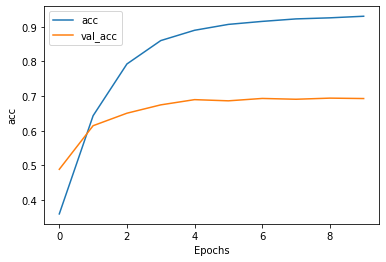

In [0]:
plot_graphs(history, "acc")

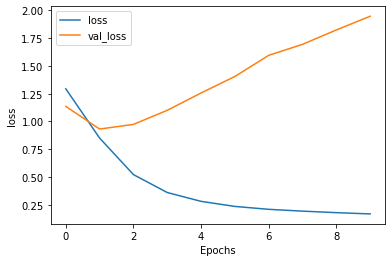

In [0]:
plot_graphs(history, "loss")

In [0]:
results = model.evaluate(valid_data, valid_labels)

35615/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
print('Test accuracy: ', results[1])

Test accuracy:  0.6929384


In [0]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 60)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')